In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In machine learning, we are familiar with the concept of error and we are generally concerned with minimizing said error by modelling error as a function and defining the optimal model that has the lowest error

Recall in linear regression, we were conerned with minimising the sum of squared residuals. In Calculus, to find the optimal point of a function, we must utilize the **derivative**.

In vector (multi-dimensional) calculus, we generalize the concept of the derivative as the gradient.

The gradient is the derivative of a single function of all of its variables. We use the gradient in roder to create a **directional derivative**. The directional derivative gives us both a direction and magnitute of "how steep" the function is at that point and facing that direction. Our goal is follow the directional derivatives to find the minimum (or maximum) value of a function.

Imagine a three-dimensional error function for linear regression

<img src="images/error.png">

On a cross section, we are attempting to find the bottom of that function given a starting point

<img src="images/2d-grad.gif">

In a 3-d plot:

<img src="images/3d-grad.png">



<b>Gradient descent</b>, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the  direction of the negative of the gradient. <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ and learning rate $\alpha$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>




As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

In [2]:
# define a function f
f = lambda x: x**3-2*x**2+2

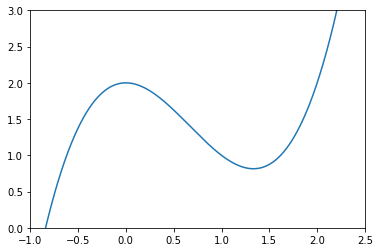

In [3]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

In [4]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
learning_rate = 0.1 # step size
precision = 0.0001  # stopping criterions

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    gradient = f_prime(x_old)
    x_new = x_old + (learning_rate * -gradient)
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)

Local minimum occurs at: 1.33342535085
Number of steps: 17


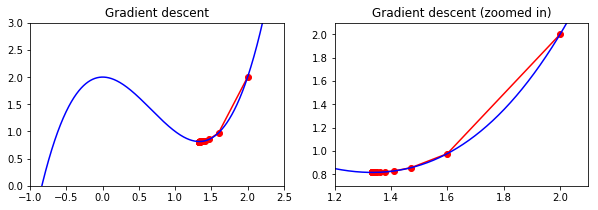

In [5]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([.7,2.1])
plt.title("Gradient descent (zoomed in)")
plt.show()

Why do we follow the negative gradient (negative derivatives?) Because to calculate the directional derivative we must do:

Directional Derivative of function f($D_u(f)$) = $\nabla f.u$ where u is the unit vector in the direction we care about.

|| indicates **magnitute** which is the length of the vector. The magnitute of the directional derivative gives us the rate of change of movement in that direction.

We also know that $\nabla f.u = |\nabla(f)|$* $|u|$*$cos(\theta)$ where $\theta$ is the angle between the two vectors.

because $u$ is a unit vector, it has length one, so we are left with

$D_u(f) = |\nabla(f)|cos(\theta)$

The maximum value of this directional derivative ccours when the $cos(\theta) = 1$ when $\theta=0$ therefore when the vector u is the same direction as $\nabla f$

The maximum value of $D_u(f)$ (and hence then the maximum rate of change of the function  ) is therefore given by $|D_u(f)|$  and will occur in the direction given by $\nabla f(x)$.

In [ ]:
#????

In [6]:
# Let's take a look at a real example

In [7]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression 

/Users/gasf/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


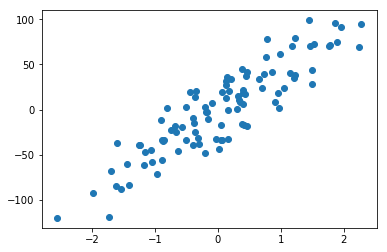

In [9]:
# Make a dataset that can be fit fairly well with linear regression
X, y = make_regression( n_samples=100, n_features=1, random_state=0, noise=20) 
plt.scatter(X, y)

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The function that we are trying to minimize in this case is the sum of squared residuals:

$J(\theta_0,\theta_1) = \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$

In this case, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = 2  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = 2  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

In [10]:
# a function to make the y coordinate from the x, m, and b variables
def computeYCoordinate(b, m, x_point):
    return b + (np.dot(m, x_point))

In [11]:
computeYCoordinate(2, 1, 4)  # 6 = 1(4) + 2

6

In [12]:
# y = mx + b
# m is slope, b is y-intercept
# given b and m, calculate the average squared error between the line and the data
def computeErrorForLineGivenPoints(b, m):
    totalError = 0
    for i in range(0, len(X)):
        totalError += (y[i] - computeYCoordinate(b, m, X[i])) ** 2
    return totalError

In [13]:
computeErrorForLineGivenPoints(1, 1)  # sum of squared residuals for the line y = 1*x + 1

array([ 223612.85471532])

In [14]:
# OK, heres the real s**t

# this function computes a single iteration of gradient descent
# for a given b and m value and a learning_rate, it will calculate the gradient of the the sum of squared residuals
# and then change the b and m values by adding the negative of the gradient (which is the fastest descent of the function)

def stepGradient(b_current, m_current, learningRate): #improving datapoint by point
    b_gradient = 0  # start b and m gradient at 0
    m_gradient = 0
    N = float(len(X))
    for i in range(0, len(X)):    
        # this is creating the b_gradient and m_gradient values
        b_gradient += 2 * (computeYCoordinate(b_current, m_current, X[i]) - y[i])
        m_gradient += 2 * X[i] * (computeYCoordinate(b_current, m_current, X[i]) - y[i])
    new_b = b_current + (learningRate * -b_gradient)  # add the negative of the gradient times the learning rate
    new_m = m_current + (learningRate * -m_gradient)
    return [new_b, new_m]

In [15]:
# Why a learning rate?



In [16]:
x_old = 0
x_new = 2 # The algorithm starts at x=2


learning_rate = .45 # step size IS NOW .45
max_steps = 10  # setting a max number of steps its allowed to take

precision = 0.0001  # stopping criterions

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision and max_steps > 0:
    max_steps -= 1
    x_old = x_new
    gradient = f_prime(x_old)
    x_new = x_old + (learning_rate * -gradient)
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)

Local minimum occurs at: 1.3632337343
Number of steps: 11


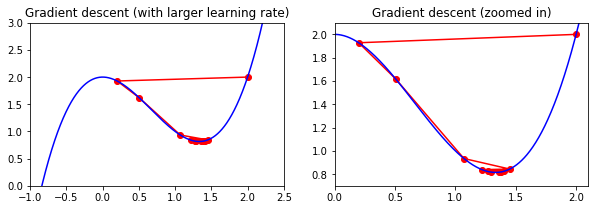

In [17]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent (with larger learning rate)")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0,2.1])
plt.ylim([.7,2.1])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [18]:
x_old = 0
x_new = 2 # The algorithm starts at x=2


learning_rate = .5 # step size IS NOW .5
max_steps = 10  # setting a max number of steps its allowed to take

precision = 0.0001  # stopping criterions

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision and max_steps > 0:
    max_steps -= 1
    x_old = x_new
    gradient = f_prime(x_old)
    x_new = x_old + (learning_rate * -gradient)
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)

Local minimum occurs at: 0.0
Number of steps: 3


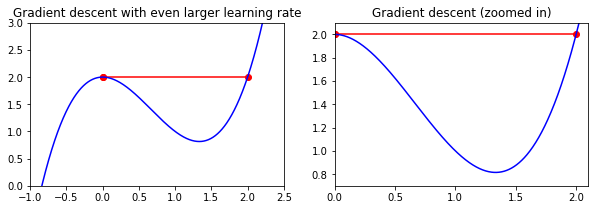

In [19]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent with even larger learning rate")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0,2.1])
plt.ylim([.7,2.1])
plt.title("Gradient descent (zoomed in)")
plt.show()

0 0 [ 232303.37018662] original error


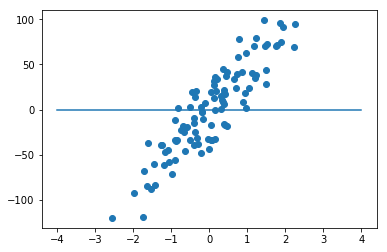

step 1 [ 0.1869221] [ 8.71749533] [ 164043.62049684]


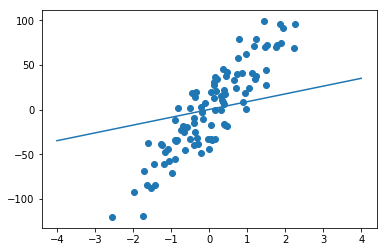

step 2 [ 0.23218456] [ 15.65542552] [ 120817.54424213]


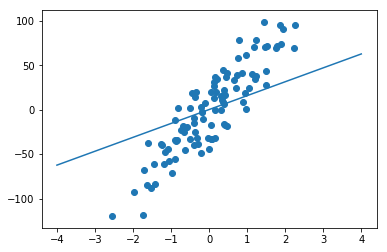

step 20 [-1.46586746] [ 42.37972975] [ 45693.18179626]


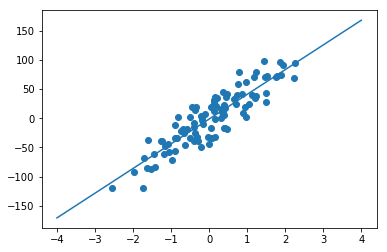

step 40 [-1.62483261] [ 42.8476391] [ 45668.59880405]


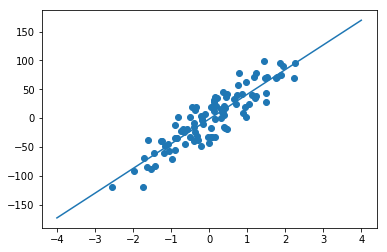

(array([-1.62778447]), array([ 42.85255258]))

In [20]:
old_b, old_m = 0, 0 # starting values for b and m
print old_b, old_m, computeErrorForLineGivenPoints(old_b, old_m), "original error"

plt.plot([-4,4], [old_m * -4 + old_b,old_m * 4 + old_b])
plt.scatter(X, y)
plt.show()

scores = []
for step in range(1,50): 
    new_b, new_m = stepGradient(old_b, old_m, .001)
    if step % 20  == 0 or step < 3: 
        print "step", step, new_b, new_m, computeErrorForLineGivenPoints(new_b, new_m)
        plt.plot([-4,4], [new_m * -4 + new_b,new_m * 4 + new_b])
        plt.scatter(X, y)
        plt.show()
    scores.append(computeErrorForLineGivenPoints(new_b, new_m))
    old_b, old_m = new_b, new_m
new_b, new_m

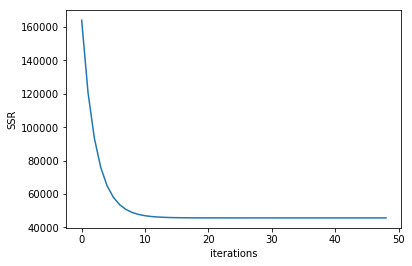

In [21]:
# plot change in SSR over iterations
iterations = np.arange(len(scores))
plt.plot(iterations,scores)
plt.xlabel("iterations")
plt.ylabel("SSR")
plt.show()

In [22]:
new_b, new_m

(array([-1.62778447]), array([ 42.85255258]))

In [23]:
from sklearn.linear_model import LinearRegression  # use sklearn linear regression

In [24]:
# sklearn coefficients
linreg = LinearRegression()
linreg.fit(X, y)
linreg.intercept_, linreg.coef_

(-1.6283636540614514, array([ 42.85335573]))

In [25]:
# This is called "Batch" gradient descent because the parameters are updated

Notice that in the method above we need to calculate the gradient in every step of our algorithm. In our example , this is not a big deal since there are only a hundred data points. But imagine that we had 2 million data points. If this were the case, it would certainly make the method above far less efficient.

In machine learning, the algorithm above is often called <b>batch gradient descent</b> to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

As we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. In <b>stochastic gradient descent</b>, we update our values after looking at <i>each</i> item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the two theta values as follows:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = 2  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = 2  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Where $h_\theta(x) = \theta_0 + \theta_1 x$

Then we followed this algorithm (where $\alpha$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had a hundred data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_{1} \\ 
 \theta_2 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \theta_1 \\ 
 \theta_2 \\ 
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(h_\theta(x_i)-y_i) \\ 
 2x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for k in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

With batch gradient descent, we must go through the entire data set before we make any progress. With this algorithm though, we can make progress right away and continue to make progress as we go through the data set. Therefore, stochastic gradient descent is often preferred when dealing with large data sets.

Unlike gradient descent, stochastic gradient descent will tend to oscillate <i>near</i> a minimum value rather than continuously getting closer. It may never actually converge to the minimum though. One way around this is to slowly decrease the step size $\alpha$ as the algorithm runs. However, this is less common than using a fixed $\alpha$.

In [ ]:
def stepGradient(b_current, m_current, learningRate):
    b_gradient = 0  # start b and m gradient at 0
    m_gradient = 0
    N = float(len(X))
    for i in range(0, len(X)):    
        # this is creating the b_gradient and m_gradient values
        b_gradient += 2 * (computeYCoordinate(b_current, m_current, X[i]) - y[i])
        m_gradient += 2 * X[i] * (computeYCoordinate(b_current, m_current, X[i]) - y[i])
    new_b = b_current + (learningRate * -b_gradient)  # add the negative of the gradient times the learning rate
    new_m = m_current + (learningRate * -m_gradient)
    return [new_b, new_m]

In [26]:
# Same example, with stochastic

# this function computes a single iteration of gradient descent
# for a given b and m value and a learning_rate, it will calculate the gradient of the the sum of squared residuals
# and then change the b and m values by adding the negative of the gradient (which is the fastest descent of the function)

def stochasticGradient(b_current, m_current, learningRate):
    N = float(len(X))
    for i in range(0, len(X)):    
        # this is creating the b_gradient and m_gradient values
        b_gradient = 2 * (computeYCoordinate(b_current, m_current, X[i]) - y[i])
        m_gradient = 2 * X[i] * (computeYCoordinate(b_current, m_current, X[i]) - y[i])
        b_current += (learningRate * -b_gradient)  # add the negative of the gradient times the learning rate
        m_current += (learningRate * -m_gradient)
    return b_current, m_current

0 0 [ 232303.37018662] original error


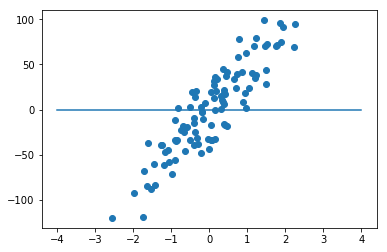

step 1 [ 0.10889323] [ 7.87005966] [ 170001.20983312]


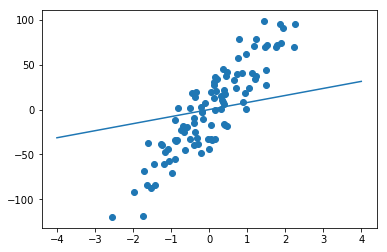

step 2 [ 0.12004391] [ 14.28314429] [ 128586.30892575]


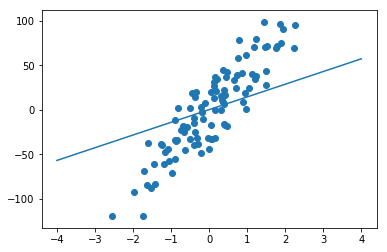

step 20 [-1.51264704] [ 41.89262257] [ 45762.69548476]


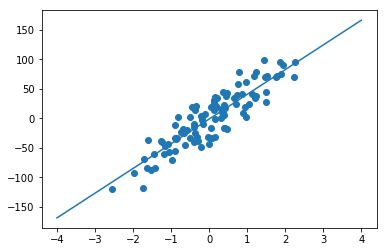

step 40 [-1.71967929] [ 42.61921471] [ 45675.27264594]


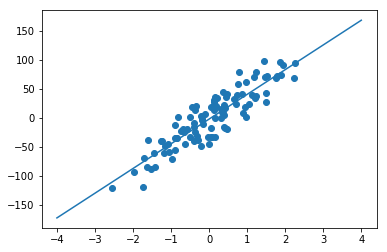

(array([-1.72541229]), array([ 42.63054079]))

In [27]:
old_b, old_m = 0, 0 # starting values for b and m
print old_b, old_m, computeErrorForLineGivenPoints(old_b, old_m), "original error"

plt.plot([-4,4], [old_m * -4 + old_b,old_m * 4 + old_b])
plt.scatter(X, y)
plt.show()

scores = []
for step in range(1,50): 
    new_b, new_m = stochasticGradient(old_b, old_m, .001)
    if step % 20  == 0 or step < 3: 
        print "step", step, new_b, new_m, computeErrorForLineGivenPoints(new_b, new_m)
        plt.plot([-4,4], [new_m * -4 + new_b,new_m * 4 + new_b])
        plt.scatter(X, y)
        plt.show()
    scores.append(computeErrorForLineGivenPoints(new_b, new_m))
    old_b, old_m = new_b, new_m
new_b, new_m

In [28]:
# Note the m and b are SLIGHTLY different than with batch
# (array([-1.62778447]), array([ 42.85255258]))
# stochastic results are not always the actual minimum because of the noise in the error

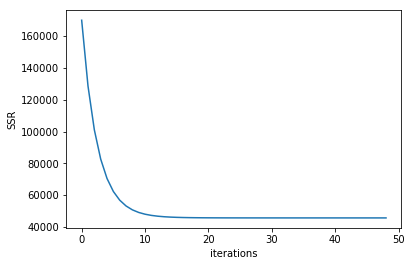

In [29]:
# plot change in SSR over iterations in sotchastic gradient descent
iterations = np.arange(len(scores))
plt.plot(iterations,scores)
plt.xlabel("iterations")
plt.ylabel("SSR")
plt.show()

In [ ]:
# each time different parameters

Let's look at another example where we illustrate the use of stochastic gradient descent for linear regression. In the example below, we'll create a set of 500,000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100:

In [30]:

# function that makes line with noise
# m = 17
# b = 2
f = lambda x: x*2+17+np.random.randn(len(x))*10

large_X = np.random.random(500000)*100
large_y = f(large_X)
m = len(large_y)

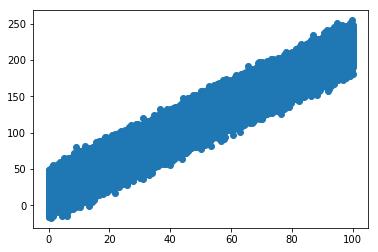

In [31]:
plt.scatter(large_X, large_y)

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

In [32]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = range(len(large_X))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(large_X[i])
    y_shuf.append(large_y[i])

In [33]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: (h(theta_0,theta_1,x_i)-y_i)**2  # get squared residual of a single example

In [34]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1] meaning m = 1 and b = 1
# note here that theta0 is b and theta1 is m
n_k = 0.00001 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        # update parameters for EACH training example
        s_k[0] = (h(theta_old[0],theta_old[1],large_X[i])-large_y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],large_X[i])-large_y[i])*large_X[i]
        s_k = (-1)*s_k  # negative gradient
        theta_new = theta_old + n_k * s_k # add negative gradient times learning rate to parameters
        sum_cost += cost(theta_old[0],theta_old[1],large_X[i],large_y[i]) # calculate SUM of squared residuls
        if (i+1) % 10000 == 0:  # every so often, add cost to to list of costs
            cost_list.append(sum_cost)
            sum_cost = 0   
            
print "Local minimum occurs where:"
print "theta_0(m) =", theta_new[0] 
print "theta_1(b) =", theta_new[1]

Local minimum occurs where:
theta_0(m) = 17.0460059454
theta_1(b) = 2.04141501583


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

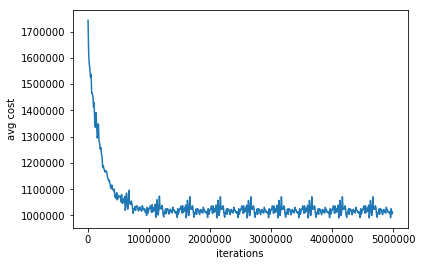

In [35]:
# notice the noise in out cost deduction
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

In [ ]:
# why? random data points little bit worse or better????

In [ ]:
# all the code above is like this in scitlearn

In [36]:
# scikit-learn has its own stocastic gradient descent modules
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDRegressor, SGDClassifier

clf = SGDRegressor(loss='squared_loss', n_iter=200)
# squared loss is sum of squared residuals minimization
# so what model minimizes su of squared residuals?
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=200, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [37]:
clf.intercept_, clf.coef_

(array([-1.63710767]), array([ 42.83714596]))

In [38]:
large_X = np.array(large_X).reshape(500000,1)
large_y = np.array(large_y).reshape(500000,1)

In [39]:
clf = SGDRegressor(loss='squared_loss', n_iter=200)

clf.fit(large_X, large_y)
clf.intercept_, clf.coef_

/Users/gasf/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([ 16.84051312]), array([ 1.97117347]))

In [40]:
iris = datasets.load_iris() # how performs on non-linear
iris_X = iris["data"]
iris_Y = iris["target"]

numFolds = 10
kf = KFold(len(iris_X), numFolds, shuffle=True)


In [41]:
# These are "Class objects". For each Class, find the AUC through
# 10 fold cross validation.

In [42]:
Models = [LogisticRegression, SGDClassifier]
params = [{}, {"loss": "log", 'n_iter':1000}]

for param, Model in zip(params, Models):
    total = 0
    for train_indices, test_indices in kf:
        train_X = iris_X[train_indices, :]; train_Y = iris_Y[train_indices]
        test_X = iris_X[test_indices, :]; test_Y = iris_Y[test_indices]
        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        total += accuracy_score(test_Y, predictions)

    accuracy = total / numFolds
    print "Accuracy score of {0}: {1}".format(Model.__name__, accuracy)

# Accuracy score of LogisticRegression: 0.95333
# Accuracy score of SGDClassifier: 0.94

Accuracy score of LogisticRegression: 0.953333333333
Accuracy score of SGDClassifier: 0.946666666667


In [43]:
# run it again, note the score changes, because of the shuffling of the data in each time we
# fit a SGD model

Models = [LogisticRegression, SGDClassifier]
params = [{}, {"loss": "log", 'n_iter':1000}]

for param, Model in zip(params, Models):
    total = 0
    for train_indices, test_indices in kf:
        train_X = iris_X[train_indices, :]; train_Y = iris_Y[train_indices]
        test_X = iris_X[test_indices, :]; test_Y = iris_Y[test_indices]
        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        total += accuracy_score(test_Y, predictions)

    accuracy = total / numFolds
    print "Accuracy score of {0}: {1}".format(Model.__name__, accuracy)

# Accuracy score of LogisticRegression: 0.96
# Accuracy score of SGDClassifier: 0.96

Accuracy score of LogisticRegression: 0.953333333333
Accuracy score of SGDClassifier: 0.953333333333


In [46]:
from sklearn.grid_search import GridSearchCV

In [47]:
# many parameters to optimize over, WARNING SLOW
iris = datasets.load_iris()
sgd = SGDClassifier()
parameters = {'loss':("hinge", "log", "modified_huber", "squared_hinge", "perceptron"), 
              'penalty':('none', 'l2', 'l1', 'elasticnet'),
              'alpha': (1e-4,1e-3,1e-2,1e-1,1,1e1),
              'n_iter': (100, 1000, 10000)
             }
clf = GridSearchCV(sgd, parameters, scoring='accuracy')
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('none', 'l2', 'l1', 'elasticnet'), 'loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'), 'n_iter': (100, 1000, 10000), 'alpha': (0.0001, 0.001, 0.01, 0.1, 1, 10.0)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [48]:
clf.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', n_iter=10000,
       n_jobs=1, penalty='none', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

In [49]:
clf.best_score_

0.9866666666666667

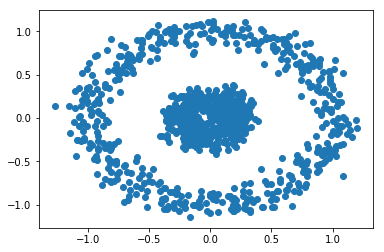

In [50]:
# MORE DATA

# Logistic Regression is a high bias low variance model ????

from sklearn.datasets import make_circles
from sklearn.cross_validation import cross_val_score
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

In [53]:
# many parameters to optimize over for circles, WARNING VERY SLOW
sgd = SGDClassifier()
parameters = {'loss':("hinge", "log", "modified_huber", "squared_hinge", "perceptron"), 
              'penalty':('none', 'l2', 'l1', 'elasticnet'),
              'alpha': (1e-4,1e-3,1e-2,1e-1,1,1e1),
              'n_iter': (100, 1000, 10000)
             }
clf = GridSearchCV(sgd, parameters, scoring='accuracy')
clf.fit(circles_X, circles_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('none', 'l2', 'l1', 'elasticnet'), 'loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'), 'n_iter': (100, 1000, 10000), 'alpha': (0.0001, 0.001, 0.01, 0.1, 1, 10.0)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [54]:
print clf.best_estimator_
print
print clf.best_score_, "accuracy"

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=100, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

0.662 accuracy


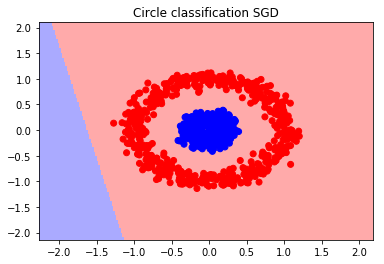

In [59]:
# SGD implements model that have a linear decision boundary. It is no different than logistic regression and linear
# regression at its simplest

# Run this cell several times to see the model fit itself widly differently each time!

from matplotlib.colors import ListedColormap
import numpy as np

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
best_model = clf.best_estimator_
best_model.fit(circles_X, circles_y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Circle classification SGD")

plt.show()

**To summarize, from sklearn...**

Stochastic Gradient Descent is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:
* Efficiency.
* Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
* SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
* SGD is sensitive to feature scaling.


In [75]:
# some issues we will deal with on Thursday..

# high variance of the model (by varying learning rate)
# exploiting speed by adding to complexity of models (neural net / deep learning)